In [1]:
import open3d as o3d
import numpy as np
import copy

from Eval.Mesh import CreatePointcloudFromMeshVertices
from Eval.Clouds.Sphere import CreateBaseSpherePointCloud
from Eval.Error import CalculateRMSE
from Eval.Plotting import plot_technique_rmse
from Utils.Data import saveJSON, loadJSON

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# Create Base Clouds for Comparison, Created Programatically for High Accuracy.

baseSphere = CreateBaseSpherePointCloud(diameter = 1.0, resolution=5000)


In [3]:
# Get the Obtained Data Clouds for Comparison, on the Base Programatically Created Clouds.

eval = 'point_e'

evalDataDir = f'../data/{eval}/sphere.ply'

collectedSphere = CreateBaseSpherePointCloud(diameter = 1.34, resolution=3000) # Temp For RMSE Collection Testing
#collectedSphere = CreatePointcloudFromMeshVertices(evalDataDir)

In [4]:
# Perform ICP Registration to Obtain a Transformation Matrix
# This allows for more accurate comparison of the clouds, by making them similar positioning.


icpRegResults = o3d.pipelines.registration.registration_icp(baseSphere, 
                                                            collectedSphere, 
                                                            0.1, 
                                                            np.identity(4), 
                                                            o3d.pipelines.registration.TransformationEstimationPointToPoint(), 
                                                            o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=1000))

print(icpRegResults)

# Apply the Transformation Matrix to the Obtained Data Clouds

baseSphere.transform(icpRegResults.transformation)

RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.


PointCloud with 5000 points.

In [5]:
# Quick Visualization of both the Obtained Cloud and the Base Cloud.

baseTemp = copy.deepcopy(baseSphere)
baseTemp.paint_uniform_color([0.5, 0.5, 0.5])

targetTemp = copy.deepcopy(collectedSphere)
targetTemp.paint_uniform_color([1, 0, 0])

o3d.visualization.draw(
   title="Base Sphere vs Target Sphere",
    geometry=[
        baseTemp,
        targetTemp
    ], 
    width=800, 
    height=600
)

[Open3D INFO] Window window_0 created.[Open3D INFO] ICE servers: {"stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"}

[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.


KeyboardInterrupt: 

In [6]:
# Calculate the RMSE between the two clouds.

rmse = CalculateRMSE(baseSphere, collectedSphere)

print(f'RMSE: {rmse}')

RMSE: 0.17067397846888457


In [7]:
# Add the RMSE to the data file.

data = loadJSON("../data/techniques-rmse.json")

data.update({
    f"{eval}": {
        "sphere": {
            "rmse": rmse,
            "inlier_rmse": icpRegResults.inlier_rmse
        }
    }
})

saveJSON("../data/techniques-rmse.json", data)

C:\Users\finnd\AppData\Local\Temp\ipykernel_616\2650003081.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


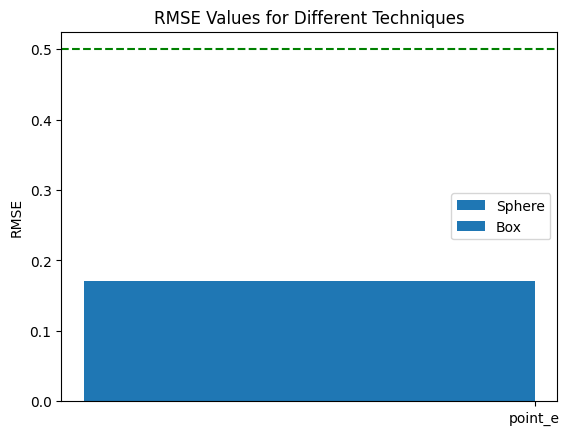

In [8]:
# Create Figure Based on Current Dataset

fig = plot_technique_rmse(data)

fig.show()

In [ ]:
# Save Figure

fig.savefig("../data/techniques-rmse.png", format="png", dpi=300)